In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import xarray as xr

# Partie 1 : importation du dataset et fonction utilitaire (affichage)

In [20]:

import utils
multi_data=utils.load_data_set()
multi_data.loc["2018-06-07"]

,lon,x,y,lat,B01,B02,B03,B04,B05,B06,B07,B08,B08A,B11,B12,label,distance
0,26.564011,0,0,39.109287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
1,26.564127,1,0,39.109287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
2,26.564241,2,0,39.109287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
3,26.564358,3,0,39.109291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
4,26.564474,4,0,39.109291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,26.568302,37,23,39.107231,0.03242,0.033596,0.028051,0.021365,0.021222,0.023294,0.026041,0.024374,0.026119,0.020089,0.015865,0.0,29.732137
1004,26.568419,38,23,39.107231,0.03158,0.030862,0.025498,0.020427,0.018660,0.021352,0.023715,0.021964,0.022231,0.017603,0.014371,0.0,30.413813
1005,26.568535,39,23,39.107231,0.03158,0.030472,0.025625,0.017966,0.018660,0.021352,0.023715,0.021964,0.022231,0.017603,0.014371,0.0,31.112698
1006,26.568649,40,23,39.107231,0.03158,0.030732,0.024221,0.017028,0.017962,0.019867,0.021498,0.018635,0.021042,0.017293,0.012770,0.0,31.827661


In [37]:
def get_image(data,argument):
    if len(argument)==1:


        shape=(len(data.y.unique()),len(data.x.unique()))
        return np.array(data[argument]).reshape(shape)
    elif len(argument)==3:#image couleur
        shape=(len(data.y.unique()),len(data.x.unique()),3)
        return np.array(data[argument]).reshape(shape)

    

In [12]:
def plot_image(data_frame,arguments=["B04","B03","B02"],normalize=-1,alpha=-1,cmap="rainbow"):#normalize donne la valeur pour normaliser. si non donnée ou inf à 0, on prend le max de l'image
    shape=(len(data_frame.x.unique()),len(data_frame.y.unique()),len(arguments))
    to_plot=np.array(data_frame[arguments]).reshape(shape)
   
    
    if normalize<0:
        
        if np.any(np.isfinite(to_plot)):#si au moins une des valeurs est de valeur fini
            normalize=np.nanmax(to_plot)
        else:
            print("pas de donnée pour cette image")
            return None#pas la peine d'afficher

    if alpha>=0:#si on utilise le parametre alpha -> on est sur l'image avec le label=1
        alphas=alpha*to_plot[:,:,0]
        print(alphas.shape)
    else:
        alphas=1.
   
    to_plot=np.array(to_plot/normalize)#normalize the luminosity

    plt.imshow(to_plot,alpha=alphas,cmap=cmap)


# II algorithme KMEANS


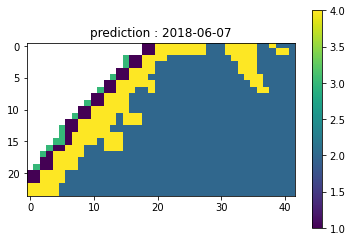

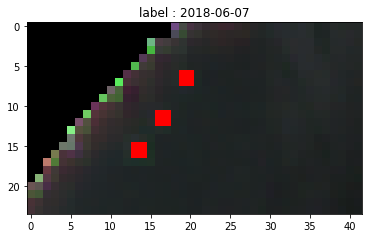

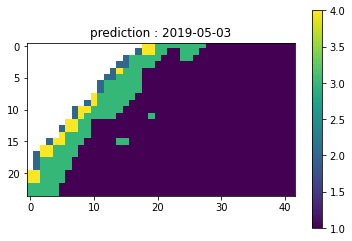

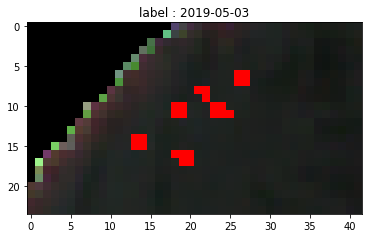

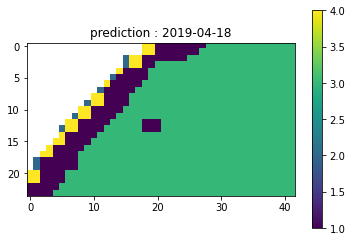

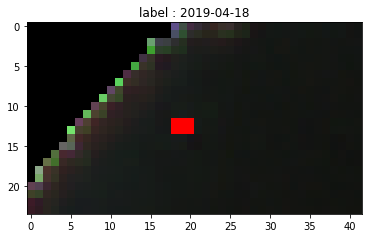

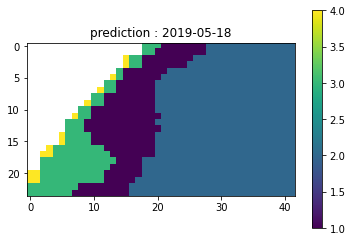

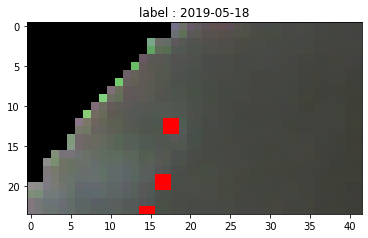

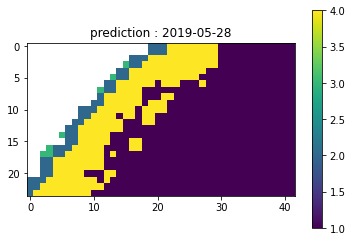

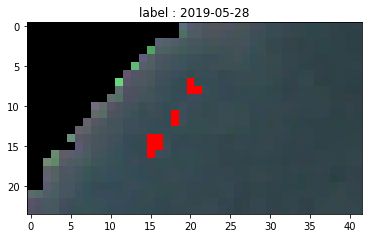

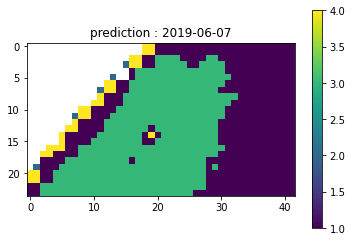

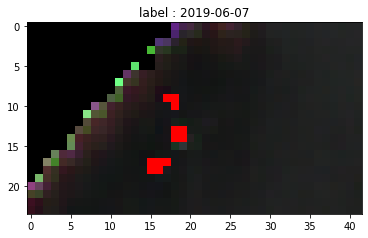

In [47]:
from sklearn.cluster import KMeans

def k_moyen(current_image):
     X=current_image[["B04","B06","B08","B11"]].dropna()
     return KMeans(n_clusters=4,random_state=0).fit_predict(X),X.index



bands=["B04","B06","B08"]#bands pour l'affichage visuel
max=multi_data[bands].max().max()#maximum pour pouvoir afficher correctement les images
for i in multi_data.index.unique(level=0):

    current_image=multi_data.loc[i]
    resultat,index=k_moyen(current_image)
    
    multi_data.loc[i,"prediction"]=np.array(pd.Series(resultat+1,index=index).reindex(current_image.index))
    plt.figure()
    plt.title("prediction : "+i)
    to_plot=get_image(multi_data.loc[i],["prediction"])
    plt.imshow(to_plot)
    plt.colorbar()
    plt.figure()
    plt.title("label : "+i)
    to_plot=get_image(multi_data.loc[i],bands)
    plt.imshow(to_plot/max)
    to_plot=get_image(multi_data.loc[i],["label"])

    alphas=1*to_plot[:,:]
    plt.imshow(to_plot,alpha=alphas,cmap='rainbow')
    #plot_image(multi_data.loc[i],arguments=bands,normalize=max)
    #plot_image(multi_data.loc[i],arguments=["label"],alpha=1)

spectral unmxixing et distance

k nn with k=1
certaines choses sont repris et adapté au dataframe pandas depuis le drive de basile rousse (idée de la distance euclidenne a une classe  + valeur de spectral sign (provient de IA/Plastic Spectral Unmixing.ipynb
on affiche en plus les distances en elle même, en + de la classe pédite
<ipython-input-54-3fe597ec0f37>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
prediction ne sert a rien, car les valeurs de la mers sont tonjouts plus petit
on detecte parfois les différents elements grace à la distance
la classe plastique et la classe ground se resemblent beaucoup
les signatures spectrales de l'eau ne semble pas correspondre à l'eau
pour les signatures défini par l


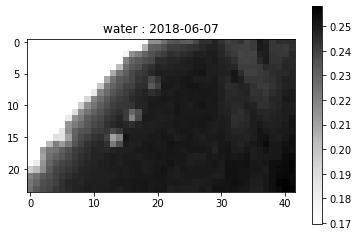

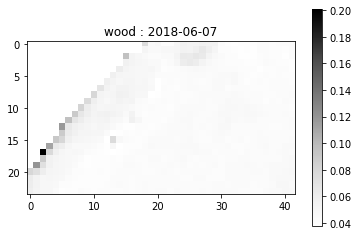

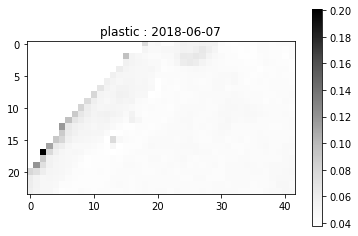

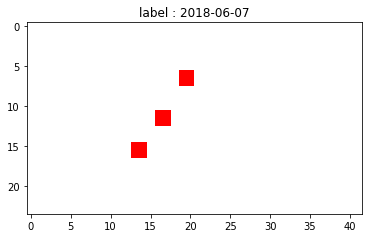

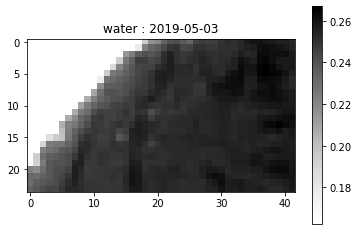

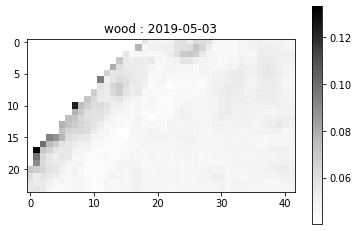

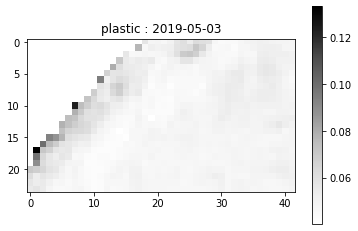

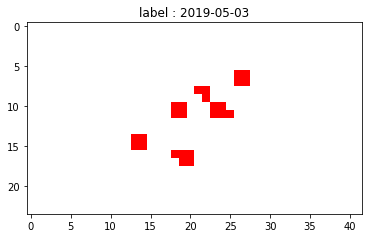

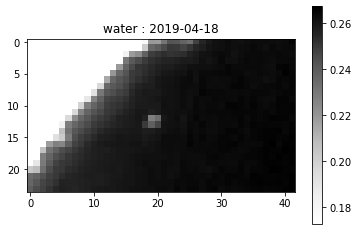

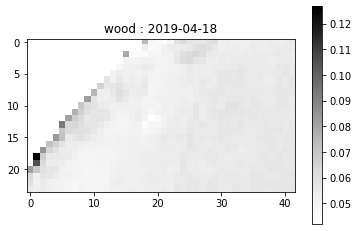

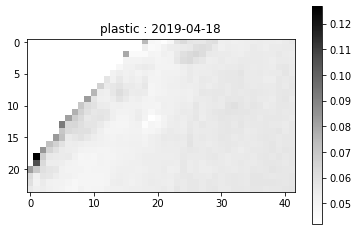

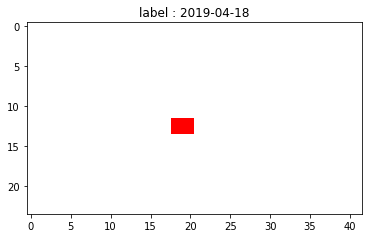

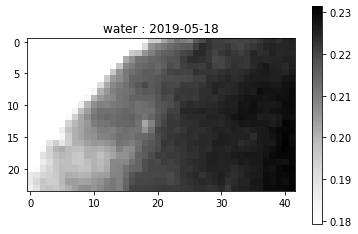

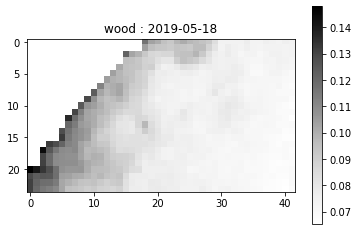

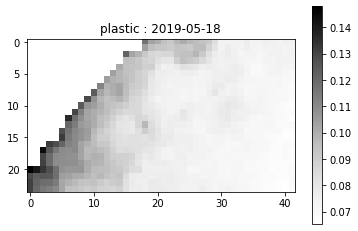

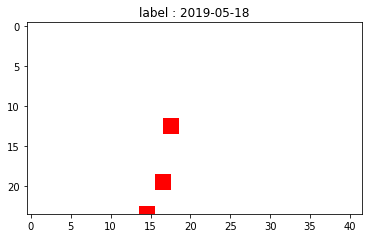

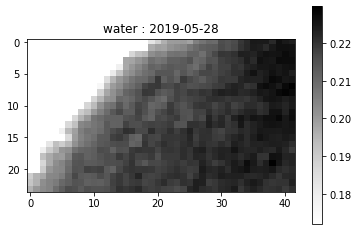

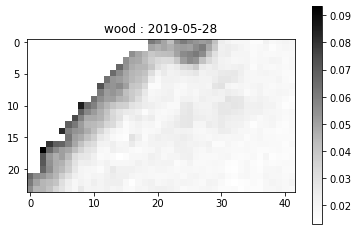

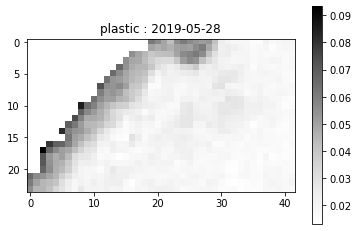

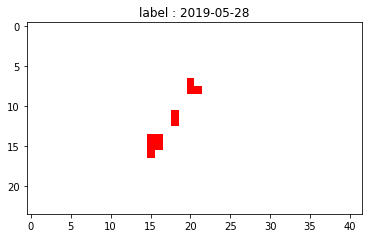

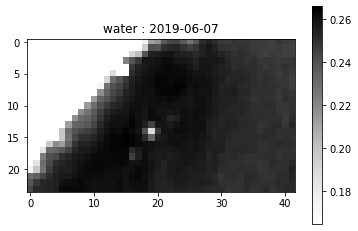

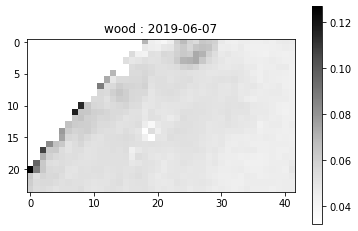

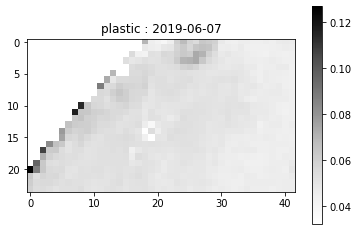

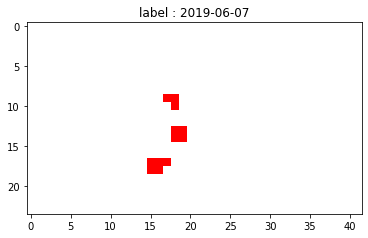

In [54]:
from scipy.spatial import distance

max=multi_data[bands].max().max()#maximum pour pouvoir afficher correctement les images
print("k nn with k=1")
print("certaines choses sont repris et adapté au dataframe pandas depuis le drive de basile rousse (idée de la distance euclidenne a une classe  + valeur de spectral sign (provient de IA/Plastic Spectral Unmixing.ipynb")
print("on affiche en plus les distances en elle même, en + de la classe pédite")

#spectral_sign = {'water': [ 0.10384066, 0.13632251, 0.16474463, 0.3045134], 'ground':[ 0.03796409, 0.03244987, 0.02011696, 0.01891139],'plastic' : [0.03825 , 0.037625, 0.0334 , 0.055125]}#adapté drive basile
spectral_sign = {'water': [ 0.03, 0.03, 0.21, 0.19], 'wood':[0.018,0.023,0.035,0.062],'plastic' : [ 0.051, 0.045, 0.033, 0.039]}#'seaweed':[ 0.02, 0.024, 0.019, 0.05]


for i in multi_data.index.unique(level=0):
        
    image_current=multi_data.loc[i]
    x=image_current[['B02','B03','B04','B08']].dropna()
    x_water=x.apply(lambda pixel:distance.euclidean(pixel,spectral_sign['water']),axis=1)
    multi_data.loc[i,"distance_water"]=np.array(x_water.reindex(current_image.index))

    x_ground=x.apply(lambda pixel:distance.euclidean(pixel,spectral_sign['wood']),axis=1)
    multi_data.loc[i,"distance_ground"]=np.array(x_ground.reindex(current_image.index))
    x_plastic=x.apply(lambda pixel:distance.euclidean(pixel,spectral_sign['plastic']),axis=1)
    multi_data.loc[i,"distance_plastic"]=np.array(x_plastic.reindex(current_image.index))
    #multi_data["prediction"]=((multi_data["distance_water"]>multi_data["distance_plastic"])|(multi_data["distance_water"]>multi_data["distance_ground"]))*1.0

for i in multi_data.index.unique(level=0):
    plt.figure()
    plt.title("water : "+i)
    to_plot=get_image(multi_data.loc[i],["distance_water"])
    plt.imshow(to_plot,cmap="Greys")
    plt.colorbar()
    plt.figure()
    plt.title("wood : "+i)
    to_plot=get_image(multi_data.loc[i],["distance_ground"])
    plt.imshow(to_plot,cmap="Greys")
    plt.colorbar()
    plt.figure()
    plt.title("plastic : "+i)

    to_plot=get_image(multi_data.loc[i],["distance_ground"])
    plt.imshow(to_plot,cmap="Greys")
    plt.colorbar()
    plt.figure()


    plt.title("label : "+i)
    
    to_plot=get_image(multi_data.loc[i],["label"])
    alphas=1*to_plot[:,:]
    plt.imshow(to_plot/max,alpha=alphas,cmap='rainbow')
    
    

print("prediction ne sert a rien, car les valeurs de la mers sont tonjouts plus petit")
print("on detecte parfois les différents elements grace à la distance")
print("la classe plastique et la classe ground se resemblent beaucoup")
print("les signatures spectrales de l'eau ne semble pas correspondre à l'eau")


print("pour les signatures défini par l")

2018-06-07
2019-05-03
2019-04-18
2019-05-18
2019-05-28
2019-06-07
des resultats douteux, il faudrait surement ajouter plus de endmenb


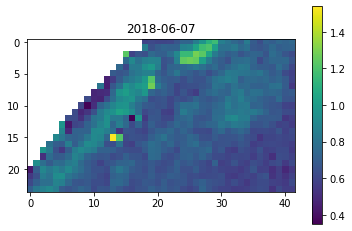

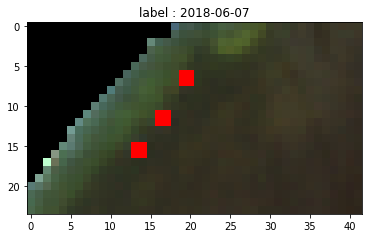

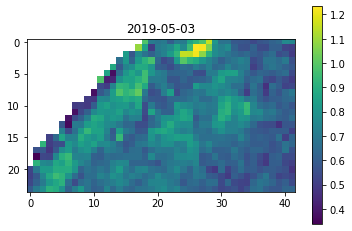

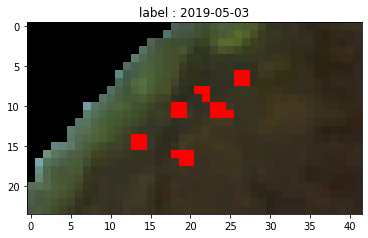

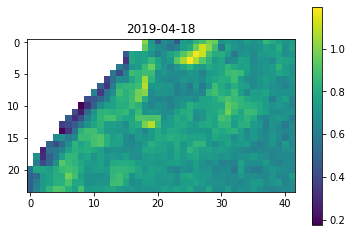

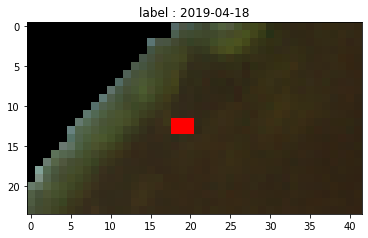

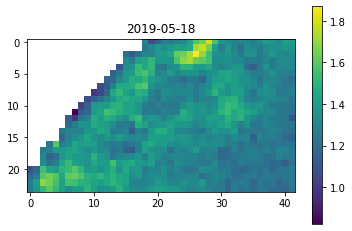

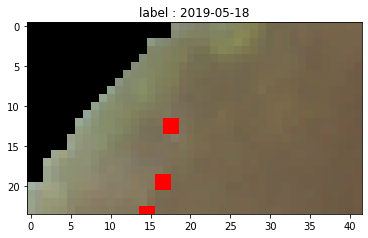

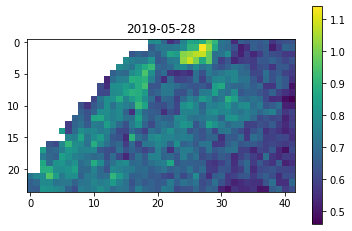

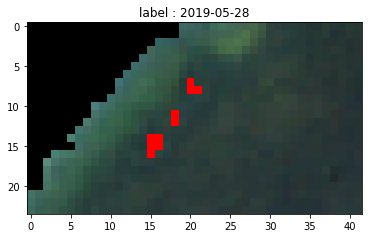

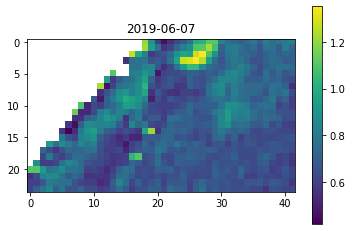

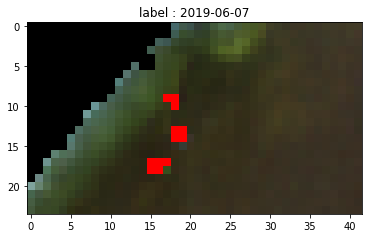

In [56]:

max=multi_data[bands].max().max()#maximum pour pouvoir afficher correctement les images
bands=['B02','B03','B04']

def mixture_tuned_matched_filtering(data_frame,element=np.array([ 0.051, 0.045, 0.033, 0.039])):
    """
    mixture tuned matched filtering

    on essaye de map l'abondance de element sans savoir le reste des élements

    dataframe : data_frame multiindex avec le premier index correspondant à l'indice de l'image


    return : data_frame avec la prediction fait par l'algorithme
    """
    for i in data_frame.index.unique(level=0):
        print(i)
        image_current=data_frame.loc[i]#on prend l'image actuelle
        x=image_current[['B02','B03','B04','B08']].dropna()#attention à ce que les chanels correspondent avec elements
        x_array=np.array(x)
        corelation=np.corrcoef(x_array.transpose())
        cor_inv=np.linalg.inv(corelation)
        valeur=element.transpose()@cor_inv@element
        matrice=(cor_inv@element).transpose()/valeur
        resultat=x.apply(lambda x:matrice@np.array(x),axis=1)
        multi_data.loc[i,"pourcent"]=np.array(pd.Series(resultat,index=resultat.index).reindex(image_current.index))#on met na dans les valeurs pas pris en compte
    return multi_data
result=mixture_tuned_matched_filtering(multi_data)


for i in multi_data.index.unique(level=0):
    
    plt.figure()
    plt.title(i)
    to_plot=get_image(result.loc[i],["pourcent"])
    plt.imshow(to_plot)
    plt.colorbar()

    plt.figure()
    plt.title("label : "+i)
    to_plot=get_image(multi_data.loc[i],bands)
    plt.imshow(to_plot/max)
    to_plot=get_image(multi_data.loc[i],["label"])

    alphas=1*to_plot[:,:]
    plt.imshow(to_plot,alpha=alphas,cmap='rainbow')
    
print("des resultats douteux, il faudrait surement ajouter plus de endmenb")
